In [1]:
# Might need to install arm - if so, uncomment the following line
#install.packages("arm")
library(arm)
library(lme4)
library(blme)
library(ggplot2)
library(stringr)
library(psycho)
library(glmnet)
library(car)

Loading required package: Matrix


Attaching package: ‘psycho’


The following object is masked from ‘package:lme4’:

    golden


Loaded glmnet 4.1-7

Loading required package: carData



In [2]:
# Set ggplot theme
base_size <- 20
theme_set(theme_bw(base_size=base_size) +
            theme(#panel.grid.major=element_blank(),
              panel.grid.minor=element_blank(),
              axis.title.y=element_text(angle=90,vjust=0.5),
              axis.text.x=element_text(angle=0, hjust=0.5),
              axis.title.x=element_blank()))

In [3]:
correct_vs_length_and_prob <- function(df, include_output_chars=TRUE, include_input_chars=TRUE){
 
    
    if (include_output_chars & include_input_chars){
        model <- glm(correct ~ input_logprob + output_logprob + input_ntokens + output_ntokens + input_nchars + output_nchars, 
               data=df, family=binomial)
    } else if (include_output_chars & !include_input_chars){
        model <- glm(correct ~ input_logprob + output_logprob + input_ntokens + output_ntokens + output_nchars, 
               data=df, family=binomial)
    } else if (!include_output_chars & include_input_chars){
        model <- glm(correct ~ input_logprob + output_logprob + input_ntokens + output_ntokens + input_nchars, 
               data=df, family=binomial)
    }
  
    
  return(model)
}

In [29]:
# For Z-scoring datasets

scale_df <- function(df) {
    new_df <- data.frame(scale(df[2:7]))
    new_df$index <- as.factor(df$index)
    new_df$correct <- df$correct
    
    return(new_df)
}

scale_taskpair_df <- function(df) {
    new_df <- data.frame(scale(df[3:8]))
    new_df$index <- as.factor(df$index)
    new_df$task <- as.factor(df$task)
    new_df$correct <- df$correct
    
    return(new_df)
}


scale_df_with_index <- function(df) {
    new_df <- data.frame(scale(df[1:7]))
    new_df$correct <- df$correct
    
    return(new_df)
}

# Shift ciphers

In [5]:
# Read in data
rot13enc_gpt4_df <- read.table(file = 'table_rot13enc_gpt-4.tsv', sep = '\t', header = TRUE)
rot13enc_gpt35_df <- read.table(file = 'table_rot13enc_gpt-3.5-turbo.tsv', sep = '\t', header = TRUE)

rot13dec_gpt4_df <- read.table(file = 'table_rot13dec_gpt-4.tsv', sep = '\t', header = TRUE)
rot13dec_gpt35_df <- read.table(file = 'table_rot13dec_gpt-3.5-turbo.tsv', sep = '\t', header = TRUE)

In [6]:
# Z-score data
scaled_rot13enc_gpt4_df <- scale_df(rot13enc_gpt4_df)
scaled_rot13enc_gpt35_df <- scale_df(rot13enc_gpt35_df)

scaled_rot13dec_gpt4_df <- scale_df(rot13dec_gpt4_df)
scaled_rot13dec_gpt35_df <- scale_df(rot13dec_gpt35_df)


In [7]:

rot13enc_gpt4_model <- correct_vs_length_and_prob(scaled_rot13enc_gpt4_df, include_output_chars=FALSE)
rot13enc_gpt35_model <- correct_vs_length_and_prob(scaled_rot13enc_gpt35_df, include_output_chars=FALSE)

rot13dec_gpt4_model <- correct_vs_length_and_prob(scaled_rot13dec_gpt4_df, include_output_chars=FALSE)
rot13dec_gpt35_model <- correct_vs_length_and_prob(scaled_rot13dec_gpt35_df, include_output_chars=FALSE)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [8]:
summary(rot13enc_gpt4_model)


Call:
glm(formula = correct ~ input_logprob + output_logprob + input_ntokens + 
    output_ntokens + input_nchars, family = binomial, data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06663  -0.44366  -0.14606  -0.01354   2.97169  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -4.1193     0.5713  -7.211 5.57e-13 ***
input_logprob    1.2158     0.4594   2.646  0.00814 ** 
output_logprob   7.0316     3.1573   2.227  0.02594 *  
input_ntokens    2.9504     0.9824   3.003  0.00267 ** 
output_ntokens  -1.5485     2.5145  -0.616  0.53802    
input_nchars     3.0854     3.3378   0.924  0.35529    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 246.58  on 299  degrees of freedom
Residual deviance: 156.14  on 294  degrees of freedom
AIC: 168.14

Number of Fisher Scoring iterations: 7


In [9]:
summary(rot13enc_gpt35_model)


Call:
glm(formula = correct ~ input_logprob + output_logprob + input_ntokens + 
    output_ntokens + input_nchars, family = binomial, data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.28769  -0.08616  -0.01909  -0.00030   3.10549  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -10.7542     2.5495  -4.218 2.46e-05 ***
input_logprob   -0.2191     1.0850  -0.202   0.8399    
output_logprob  19.6737     9.8166   2.004   0.0451 *  
input_ntokens    4.3058     2.6034   1.654   0.0982 .  
output_ntokens   4.5089     7.3753   0.611   0.5410    
input_nchars     3.5266     8.5951   0.410   0.6816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 80.845  on 299  degrees of freedom
Residual deviance: 37.569  on 294  degrees of freedom
AIC: 49.569

Number of Fisher Scoring iterations: 10


In [10]:
summary(rot13dec_gpt4_model)


Call:
glm(formula = correct ~ input_logprob + output_logprob + input_ntokens + 
    output_ntokens + input_nchars, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4640  -0.8038  -0.4112   0.8902   2.5726  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.4509     0.1977  -7.340 2.13e-13 ***
input_logprob    1.4829     1.7607   0.842   0.3996    
output_logprob   1.7068     0.3173   5.380 7.46e-08 ***
input_ntokens   -3.0153     1.6183  -1.863   0.0624 .  
output_ntokens   0.5686     0.6128   0.928   0.3535    
input_nchars     4.0308     2.1224   1.899   0.0575 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 357.64  on 299  degrees of freedom
Residual deviance: 285.30  on 294  degrees of freedom
AIC: 297.3

Number of Fisher Scoring iterations: 6


In [11]:
summary(rot13dec_gpt35_model)


Call:
glm(formula = correct ~ input_logprob + output_logprob + input_ntokens + 
    output_ntokens + input_nchars, family = binomial, data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.44662  -0.32654  -0.10349  -0.01189   2.92757  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -5.0436     0.7792  -6.473 9.62e-11 ***
input_logprob    3.2597     3.3367   0.977   0.3286    
output_logprob   3.8136     0.8978   4.247 2.16e-05 ***
input_ntokens   -5.2379     2.7949  -1.874   0.0609 .  
output_ntokens   2.4683     1.0515   2.347   0.0189 *  
input_nchars     5.5853     3.6081   1.548   0.1216    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 203.69  on 299  degrees of freedom
Residual deviance: 125.76  on 294  degrees of freedom
AIC: 137.76

Number of Fisher Scoring iterations: 8


In [12]:
vif(rot13enc_gpt4_model)

input_logprob output_logprob  input_ntokens output_ntokens   input_nchars 
      1.130600      39.299988       8.654038      29.877453      52.790918

In [13]:
vif(rot13enc_gpt35_model)

input_logprob output_logprob  input_ntokens output_ntokens   input_nchars 
      1.256390      43.209014       7.383102      30.032245      48.272562

In [14]:
vif(rot13dec_gpt4_model)

input_logprob output_logprob  input_ntokens output_ntokens   input_nchars 
     97.900802       1.389986      83.241865      13.595196     146.200936

In [15]:
vif(rot13dec_gpt35_model)

input_logprob output_logprob  input_ntokens output_ntokens   input_nchars 
     57.759362       1.365018      42.021312       9.277213      74.992264

### Distance as output

In [16]:
# Read in data
rot13encdist_gpt4_df <- read.table(file = 'table_rot13enc_gpt-4_dist.tsv', sep = '\t', header = TRUE)
rot13encdist_gpt35_df <- read.table(file = 'table_rot13enc_gpt-3.5-turbo_dist.tsv', sep = '\t', header = TRUE)

In [17]:
# Get rid of "correct"
rot13encdist_gpt4_df <- rot13encdist_gpt4_df[,-c(1,8)]
rot13encdist_gpt35_df <- rot13encdist_gpt35_df[,-c(1,8)]

# Scale
rot13encdist_gpt4_df <- data.frame(scale(rot13encdist_gpt4_df))
rot13encdist_gpt35_df <- data.frame(scale(rot13encdist_gpt35_df))

In [19]:
model_dist4 <- glm(distance ~ input_logprob + output_logprob + input_ntokens + output_ntokens + input_nchars, 
               data=rot13encdist_gpt4_df)
model_dist35 <- glm(distance ~ input_logprob + output_logprob + input_ntokens + output_ntokens + input_nchars, 
               data=rot13encdist_gpt35_df)

In [20]:
summary(model_dist4)


Call:
glm(formula = distance ~ input_logprob + output_logprob + input_ntokens + 
    output_ntokens + input_nchars, data = rot13encdist_gpt4_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.68257  -0.33897  -0.02941   0.30112   1.84476  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.154e-16  3.249e-02   0.000 1.000000    
input_logprob  -1.267e-01  4.416e-02  -2.870 0.004400 ** 
output_logprob -4.197e-02  3.234e-01  -0.130 0.896813    
input_ntokens  -1.169e+00  1.215e-01  -9.622  < 2e-16 ***
output_ntokens  1.270e+00  3.278e-01   3.874 0.000132 ***
input_nchars    4.705e-01  4.318e-01   1.090 0.276816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.3166029)

    Null deviance: 299.000  on 299  degrees of freedom
Residual deviance:  93.081  on 294  degrees of freedom
AIC: 514.27

Number of Fisher Scoring iterations: 2


In [21]:
summary(model_dist35)


Call:
glm(formula = distance ~ input_logprob + output_logprob + input_ntokens + 
    output_ntokens + input_nchars, data = rot13encdist_gpt35_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1626  -0.2882  -0.0866   0.1133  10.7318  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -9.047e-17  4.855e-02   0.000  1.00000   
input_logprob  -2.171e-01  6.600e-02  -3.290  0.00112 **
output_logprob -1.539e-01  4.833e-01  -0.318  0.75043   
input_ntokens  -5.903e-01  1.816e-01  -3.251  0.00128 **
output_ntokens -1.081e-01  4.899e-01  -0.221  0.82552   
input_nchars    8.754e-01  6.454e-01   1.356  0.17601   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.707216)

    Null deviance: 299.00  on 299  degrees of freedom
Residual deviance: 207.92  on 294  degrees of freedom
AIC: 755.38

Number of Fisher Scoring iterations: 2


### Comparing rot-2 to rot-13

In [200]:
# Read in data
rot13and2enc_gpt4_df <- read.table(file = 'table_rot13and2enc_gpt-4.tsv', sep = '\t', header = TRUE)
rot13and2enc_gpt35_df <- read.table(file = 'table_rot13and2enc_gpt-3.5-turbo.tsv', sep = '\t', header = TRUE)

rot13and2dec_gpt4_df <- read.table(file = 'table_rot13and2dec_gpt-4.tsv', sep = '\t', header = TRUE)
rot13and2dec_gpt35_df <- read.table(file = 'table_rot13and2dec_gpt-3.5-turbo.tsv', sep = '\t', header = TRUE)

In [201]:
# Z-score data
scaled_rot13and2enc_gpt4_df <- scale_taskpair_df(rot13and2enc_gpt4_df)
scaled_rot13and2enc_gpt35_df <- scale_taskpair_df(rot13and2enc_gpt35_df)

scaled_rot13and2dec_gpt4_df <- scale_taskpair_df(rot13and2dec_gpt4_df)
scaled_rot13and2dec_gpt35_df <- scale_taskpair_df(rot13and2dec_gpt35_df)


In [214]:
model_taskenc4 <- bayesglm(correct ~ task + input_nchars + input_ntokens + output_ntokens + input_logprob + output_logprob, 
               data=scaled_rot13and2enc_gpt4_df, family=binomial)


In [215]:
model_taskenc35 <- bayesglm(correct ~ task + input_nchars + input_ntokens + output_ntokens + input_logprob + output_logprob, 
               data=scaled_rot13and2enc_gpt35_df, family=binomial)

In [216]:
model_taskdec4 <- bayesglm(correct ~ task + input_nchars + input_ntokens + output_ntokens + input_logprob + output_logprob, 
               data=scaled_rot13and2dec_gpt4_df, family=binomial)

In [217]:
model_taskdec35 <- bayesglm(correct ~ task + input_nchars + input_ntokens + output_ntokens + input_logprob + output_logprob, 
               data=scaled_rot13and2dec_gpt35_df, family=binomial)

In [212]:
summary(model_taskenc4)


Call:
bayesglm(formula = correct ~ task + input_nchars + input_ntokens + 
    output_ntokens + input_logprob + output_logprob, family = binomial, 
    data = scaled_rot13and2enc_gpt4_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.25996  -0.21828  -0.07806  -0.01271   2.80272  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -2.87795    0.60339  -4.770 1.85e-06 ***
taskrot2enc_highprob -4.34689    1.55003  -2.804  0.00504 ** 
input_nchars          0.00124    1.05843   0.001  0.99907    
input_ntokens         1.97498    0.87549   2.256  0.02408 *  
output_ntokens       -1.08950    1.26502  -0.861  0.38910    
input_logprob         0.92065    0.71414   1.289  0.19734    
output_logprob        2.60027    1.44862   1.795  0.07265 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.373  on 199  degrees of free

In [218]:
summary(model_taskenc35)


Call:
bayesglm(formula = correct ~ task + input_nchars + input_ntokens + 
    output_ntokens + input_logprob + output_logprob, family = binomial, 
    data = scaled_rot13and2enc_gpt35_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.44232  -0.14866  -0.08226  -0.03545   2.65354  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.2583     1.4729  -3.570 0.000357 ***
taskrot2enc_highprob  -1.5737     1.4743  -1.067 0.285808    
input_nchars          -0.5263     1.1338  -0.464 0.642517    
input_ntokens          0.2504     1.0285   0.243 0.807675    
output_ntokens        -0.3844     1.1247  -0.342 0.732540    
input_logprob          0.9301     1.1364   0.818 0.413105    
output_logprob         0.5483     1.1348   0.483 0.628938    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.401  on 199  degrees of free

In [219]:
summary(model_taskdec4)


Call:
bayesglm(formula = correct ~ task + input_nchars + input_ntokens + 
    output_ntokens + input_logprob + output_logprob, family = binomial, 
    data = scaled_rot13and2dec_gpt4_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4273  -0.3833  -0.2060   0.7264   2.7140  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.2299     0.2493  -0.922   0.3564    
taskrot2dec_highprob  -3.6513     0.7045  -5.183 2.19e-07 ***
input_nchars           0.5057     0.9219   0.549   0.5833    
input_ntokens         -0.6930     0.9403  -0.737   0.4611    
output_ntokens         0.7964     0.5920   1.345   0.1785    
input_logprob          0.4522     0.8507   0.532   0.5950    
output_logprob         0.9671     0.4980   1.942   0.0521 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 227.10  on 199  degrees of freedom
Residua

In [221]:
summary(model_taskdec35)


Call:
bayesglm(formula = correct ~ task + input_nchars + input_ntokens + 
    output_ntokens + input_logprob + output_logprob, family = binomial, 
    data = scaled_rot13and2dec_gpt35_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.30362  -0.24753  -0.08608  -0.01631   2.30323  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.4093     0.5178  -4.653 3.27e-06 ***
taskrot2dec_highprob  -4.6894     1.5828  -2.963  0.00305 ** 
input_nchars           0.0204     0.9765   0.021  0.98334    
input_ntokens         -0.7847     1.0785  -0.728  0.46685    
output_ntokens         2.1414     0.8479   2.525  0.01156 *  
input_logprob          0.7056     0.9973   0.708  0.47923    
output_logprob         2.9299     0.9103   3.219  0.00129 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 142.737  on 199  degrees of fre

In [223]:
vif(model_taskenc4)

task   input_nchars  input_ntokens output_ntokens  input_logprob 
      1.013797       3.770700       3.595254       4.157924       1.915556 
output_logprob 
      5.243154

In [224]:
vif(model_taskenc35)

task   input_nchars  input_ntokens output_ntokens  input_logprob 
      1.006175       1.292648       1.219710       1.246919       1.198657 
output_logprob 
      1.283396

In [225]:
vif(model_taskdec4)

task   input_nchars  input_ntokens output_ntokens  input_logprob 
      1.086060      16.490929      14.195003       7.406693      13.250191 
output_logprob 
      4.626733

In [226]:
vif(model_taskdec35)

task   input_nchars  input_ntokens output_ntokens  input_logprob 
      1.015124       4.357322       4.316994       4.122773       4.239901 
output_logprob 
      2.587789

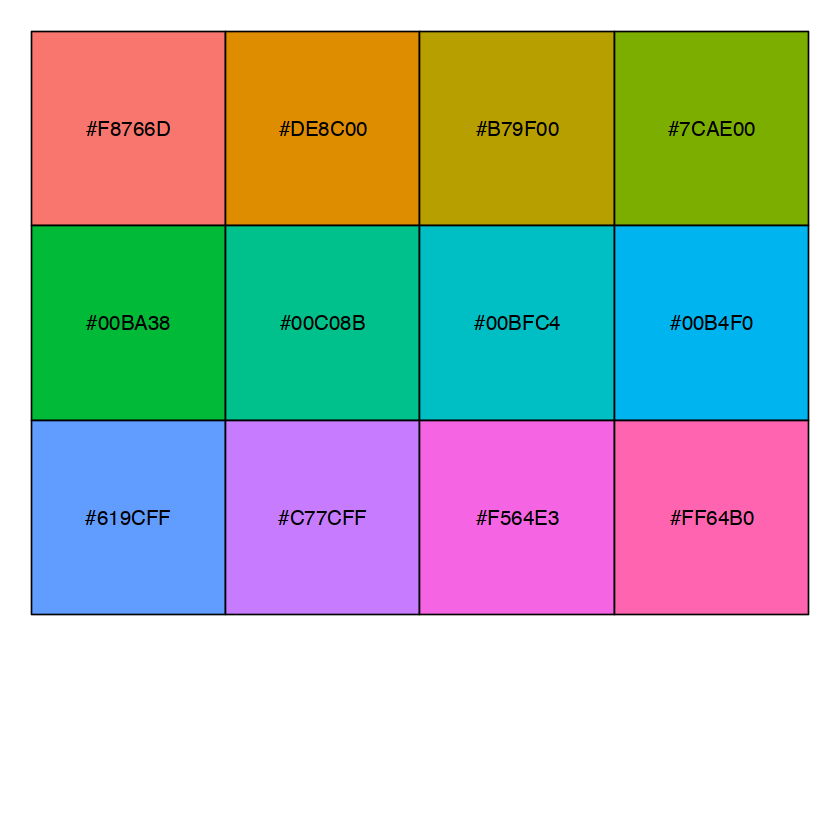

In [230]:
library(scales)
show_col(hue_pal()(12))